In [269]:
from panoptes_client import Panoptes, Project, Subject
import requests
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [270]:
subject_id = 34107836

In [271]:
subject = Subject.find(subject_id)

In [272]:
x_min = subject.metadata['#xmin time']
x_max = subject.metadata['#xmax time'] 

if not (x_min or x_max):
    raise ValueError("X Min or X Max not present") 


In [273]:
subject_image_url = subject.locations[0]['image/png']

In [274]:
r = requests.get('https://mast.stsci.edu/phad/api/v0.1/access/transit?subject_id=%s' % subject_id)

In [275]:
subject_image_url

'https://panoptes-uploads.zooniverse.org/production/subject_location/15e5edf9-7186-4b01-8a1f-f87ff6a18238.png'

In [276]:
image = mpimg.imread(subject_image_url)

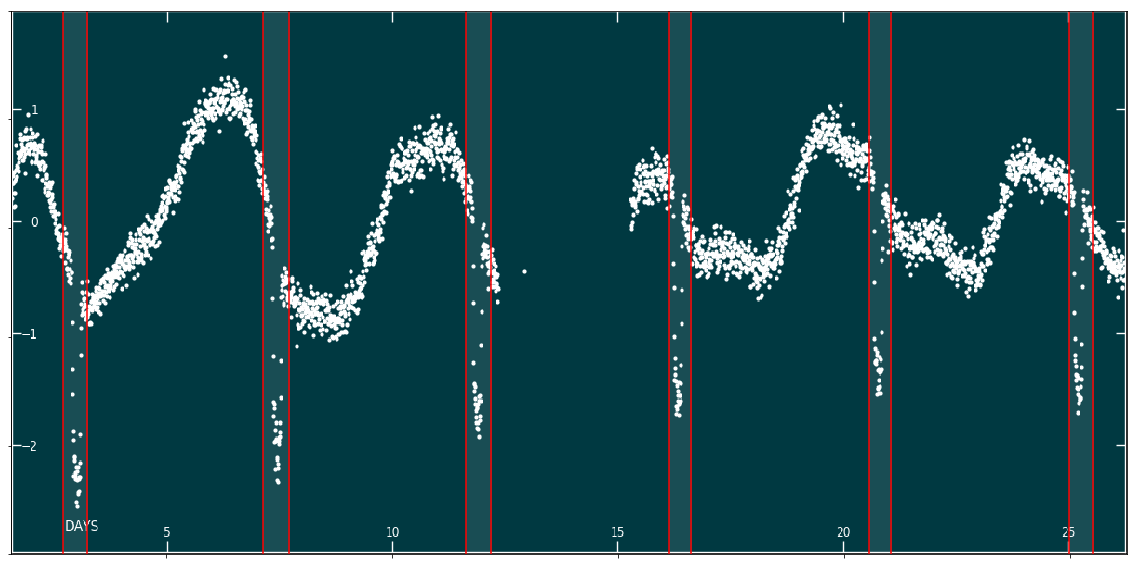

In [277]:
plt.figure(figsize=(20, 10))
plt.imshow(image, extent=[x_min, x_max, 0, 100], aspect='auto')
for transit in r.json()['data']:
    subject_id, tic_id, center, width, weightedCounts, userCounts, date = transit
    plt.axvline(x=center-(width/2), ymin=0.0, ymax=1.0, color='red')
    plt.axvline(x=center+(width/2), ymin=0.0, ymax=1.0, color='red')
    plt.axhline(y=2, xmin=center-(width/2), xmax=center+(width/2), color='red')
    plt.axhline(y=98, xmin=center-(width/2), xmax=center+(width/2), color='red')
    plt.fill_betweenx(y=[0,100], x1=center-(width/2), x2=center+(width/2), color='white', alpha=0.1)

plt.tick_params(which='both', labelbottom='off', labelleft='off')